In [52]:
import json
import os

import matplotlib.pyplot as plt
import numpy as np
import cv2

In [53]:
filename = 'data/train.json'
with open(filename, "rt") as fp:
    train_config = json.load(fp)

In [74]:
train_config[1]

{'nums': [{'box': [[794, 661], [1004, 618], [1009, 670], [799, 717]],
   'text': 'M938OX116'},
  {'box': [[944, 268], [995, 267], [994, 283], [942, 283]],
   'text': 'H881OA116'}],
 'file': 'train/1.jpg'}

In [106]:
np.asarray(train_config[0]['nums'][0]['box'])

array([[ 180,  889],
       [ 596,  951],
       [ 598, 1056],
       [ 185,  983]])

[[180, 889], [596, 951], [598, 1056], [185, 983]]

In [95]:
def draw_landmarks(image, landmarks):
    for point in landmarks:
        x, y = point.astype(np.int)
        cv2.circle(image, (x, y), 3, (255, 0, 0), 3, -1)
    return image

In [96]:
def plot_image(file_name, landamrks):
    plt.figure(figsize=(20, 10))
    image = cv2.imread(file_name)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = draw_landmarks(image, landamrks)
    plt.imshow(image)

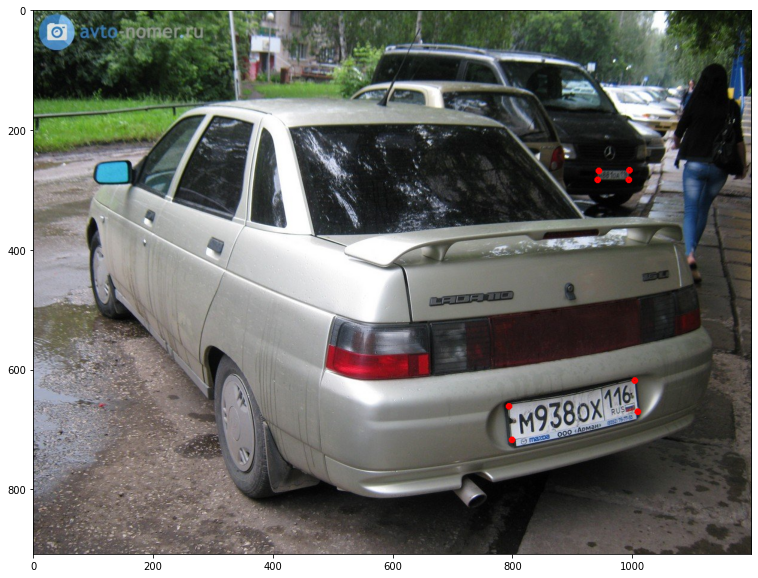

In [97]:
i = 1
file_name = os.path.join('data', train_config[i]['file'])
landamrks = np.vstack([grz['box'] for grz in train_config[i]['nums']])
plot_image(file_name, landamrks)

# Черновик

In [109]:
from argparse import Namespace
request = Namespace(
    name='message',
    data='path to data',
    crop_size=32,
    batch_size=32,
    epochs=3,
    learning_rate=0.001,
    gpu=False,
    worker=1 # worker=0 - худший результат, worker=1, 2 ... 4 примерно одинаковый результат
)

In [110]:
request.__dict__

{'name': 'message',
 'data': 'path to data',
 'crop_size': 32,
 'batch_size': 32,
 'epochs': 3,
 'learning_rate': 0.001,
 'gpu': False,
 'worker': 1}

In [111]:
np.asarray((0.5, 0.5, 0.5)).reshape((1, 1, 3))

array([[[0.5, 0.5, 0.5]]])